0.0005227705696597695
[1.6526668332517147e-05, 1.9246828742325306e-05, 3.277324140071869e-06, 2.8560752980411053e-06, 2.8334499802440405e-05, 8.361254003830254e-05, 3.763125278055668e-07, 2.183951437473297e-07, 2.3416941985487938e-07, 3.2404204830527306e-07, 1.129484735429287e-05, 2.0720763131976128e-06, 1.6821431927382946e-06, 1.4294811990112066e-05, 2.804095856845379e-06, 4.137703217566013e-05]


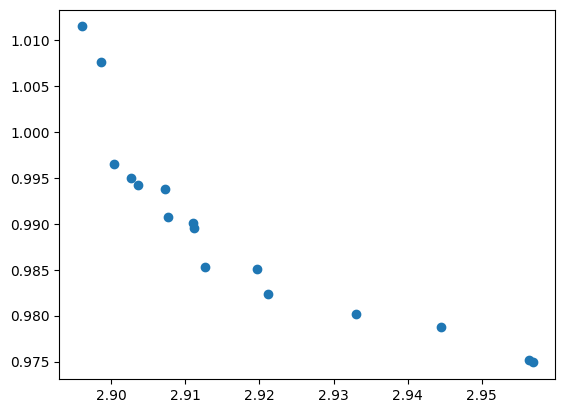

In [ ]:
import moda
import matplotlib.pyplot as plt
import numpy as np
import time
data = np.array(
[[2.93309015, 0.98014866],
 [2.91972875, 0.98511465],
 [2.92119195, 0.9823885 ],
 [2.90044519, 0.99650662],
 [2.8986138 , 1.00758202],
 [2.89605547, 1.01149431],
 [2.9036515 , 0.99421595],
 [2.91266866, 0.98525798],
 [2.90771252, 0.99072505],
 [2.91114494, 0.98950449],
 [2.90732425, 0.99380037],
 [2.91106863, 0.99012191],
 [2.90274593, 0.9949471 ],
 [2.9568786 , 0.97489954],
 [2.95633571, 0.97513668],
 [2.94451091, 0.97875965]]
    
)


argmax = data.max(axis=0)
# data = -data
# data = data - np.min(data, axis=0) + 0.01

plt.scatter(data[:,0], data[:,1])
ds = moda.DataSet(data)

solver = moda.QEHCSolver()
params = moda.QEHCParameters()
iqsolver = moda.IQHVSolver()
iqparams = moda.IQHVParameters()
start = time.time()
total_iqhv = iqsolver.Solve(ds, iqparams)[0]
print(total_iqhv)

hvc = []
for i in range(len(data)):
    data_r = np.delete(data,i,axis=0)
    ds_r = moda.DataSet(data_r)
    ctr = iqsolver.Solve(ds_r,iqparams)[0]
    hvc.append(total_iqhv - ctr)
end = time.time()

print(hvc)

In [ ]:
import moda
import matplotlib.pyplot as plt
import numpy as np
import time
data = np.array(
[[2.93309015, 0.98014866],
 [2.91972875, 0.98511465],
 [2.92119195, 0.9823885 ],
 [2.90044519, 0.99650662],
 [2.8986138 , 1.00758202],
 [2.89605547, 1.01149431],
 [2.9036515 , 0.99421595],
 [2.91266866, 0.98525798],
 [2.90771252, 0.99072505],
 [2.91114494, 0.98950449],
 [2.90732425, 0.99380037],
 [2.91106863, 0.99012191],
 [2.90274593, 0.9949471 ],
 [2.9568786 , 0.97489954],
 [2.95633571, 0.97513668],
 [2.94451091, 0.97875965]]
    
)


argmax = data.max(axis=0)
# data = -data
# data = data - np.min(data, axis=0) + 0.01
total_iqhv = iqsolver.Solve(ds, iqparams)[0]
print(total_iqhv)
hvc = []
for i in range(len(data)):
    data_r = np.delete(data,i,axis=0)
    ds_r = moda.DataSet(data_r)
    ctr = iqsolver.Solve(ds_r,iqparams)[0]
    hvc.append(total_iqhv - ctr)
end = time.time()
print(hvc)
# plt.scatter(data[:,0], data[:,1])
ds = moda.DataSet(data)

hssSolver = moda.HSSSolver()
hssParams = moda.HSSParameters()
hssParams.Criteria = 0
hssParams.StoppingSize = 15
hssParams.Strategy = moda.SubsetSelectionStrategy.Decremental
#hssParams.BetterReferencePointCalculationStyle = moda.ReferencePointCalculationStyle.exact

hssSolver.Solve(ds,hssParams)


: 

In [ ]:


hssSolver = moda.HSSSolver()
hssParams = moda.HSSParameters()

print(end - start, 's')
print(np.array(hvc).min(), np.array(hvc).argmin())
r = solver.Solve(ds, params)
r